In [61]:
# AVG num of comparison required to search for a randomally
# chosen element of a stndrd BST
import random
import numpy as np
import matplotlib.pyplot as plt

class Node:
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val
        self.count = 0

def insert(root, node):
    if root is None:
        root = node
    else:
        if root.data > node.data:
            if root.l_child is None:
                root.l_child = node
                node.parent = root
                #left count bit,,, add delete function
                count_node = node
                while count_node.parent != None:
                    count_node.parent.count +=1
                    count_node = count_node.parent
            else:
                insert(root.l_child, node)
        else:
            if root.r_child is None:
                root.r_child = node
                node.parent = root
            else:
                insert(root.r_child, node)
                
# Create our BST               
bst = [None for x in range (101)]
bst[0] = Node(50)  
lis = [x for x in range(100)]
for i in lis:
    bst[i+1] = Node(random.choice(lis))
    insert(bst[0],bst[i+1])

# FIRST EXERCISE, avg # of comparisons
def avg_cmp(bst):
    count = 0
    for node in bst:
        count += find(bst[0],node)
    return float(count)/len(bst)
        
#finds the depth of the value
def find(root, value):
    if root == None or value == root.data:
        return 1
    if value.data < root.data:
        return 1 + find(root.l_child,value)
    else: return 1 + find(root.r_child,value)
    




In [33]:
print (avg_cmp(bst))

#Test

repeats = 10000
avg = []
for i in range (repeats):
    avg.append(find(bst[0],random.choice(bst)))
print (np.mean(avg))

9.326732673267326
9.3293


In [37]:
def venture(node, counter, height_list):
    if node.l_child == None:
        if counter > height_list[-1]:
            height_list.append(counter)
    else:
        venture(node.l_child, counter + 1, height_list)
    if node.r_child == None:
        if counter > height_list[-1]:
            height_list.append(counter)
    else:
        venture(node.r_child, counter + 1, height_list)
    return height_list
        
def max_height(bst):
    height_list = venture (bst[0],1,[1])
    return max(height_list)
    
print (max_height(bst))




13


In [39]:
def venture_all(node, counter, height_list):
    if node.l_child == None:
        height_list.append(counter)
    else:
        venture(node.l_child, counter + 1, height_list)
    if node.r_child == None:
        height_list.append(counter)
    else:
        venture(node.r_child, counter + 1, height_list)
    return height_list

def avg_height(bst):
    height_list = venture (bst[0],1,[1])
    return np.mean(height_list)

avg_height(bst)

8.8000000000000007

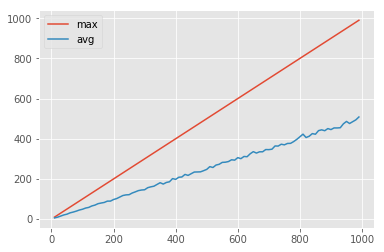

In [57]:
def create_bst(n):
    bst = []
    lis = [x for x in range(n)]
    random.shuffle(lis)
    for i in range(len(lis)):
        bst.append( Node(lis[i]))
        if i != 0:
            insert(bst[i-1],bst[i])
    return bst

xs = list(range(10,1000,10))
y1s = []
y2s = []

for n in xs:
    bst1 = create_bst(n)
    y1s.append(max_height(bst1))
    y2s.append(avg_height(bst1))

plt.style.use('ggplot')
plt.plot(xs,y1s,label = 'max')
plt.plot(xs,y2s, label = 'avg')
plt.legend()
plt.show()

In [78]:
def select(node,k):
    if node == None:
        pass
    else:
        if k == node.count:
            return node
        else: 
            left = select(node.l_child,k)
            right = select(node.r_child,k)
        if left.count == k:
            return node
        if right.count == k:
            return node
    



print (bst[3].l_child.count)
print (select(bst[0], 2))

2


AttributeError: 'NoneType' object has no attribute 'count'